**************************************
# **Prova Prática de SCC275- Ciência de Dados**
## SCC - ICMC - USP 
## Profa. Roseli Ap. Francelin Romero
### PAE: Guilherme Nardari
2o. semestre de 2020

- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
- Matheus Borges Kamla - 10277015

**************************************
Vamos utilizar o conjunto de dados do Kaggle **Titanic**. 
Ele descreve algumas características dos passageiros e como atributo alvo, a classe, se determinado passageiro sobreviveu ao nalfrágio ou não. Este é um conjunto de dados simples feito com fins educacionais composto de 12 atributos: 

**Atributo Definição Valor** 

- survival: Sobrevivente 0=Não, 1=Sim
- pclass: Classe do passageiro 1=Primeira, 2=Segunda, 3=Terceira
-sex: Sexo 
- Age: Idade em anos 
-sibsp: Número de irmãos por cônjugue abordo
-parch: Número de pais por criança abordo 
-ticket: Número do bilhete 
-fare: Valor pago 
-cabin: Número da cabine 
-embarked: Porto de embarque C=Cherbourg, Q=Queenstown, S=Southampton 


# 1 - **EXPLORAÇÃO de DADOS**(EDA)
**a)** Analise os atributos Sex, Age, SibSp, Parch, Fare, utilizando o **Boxplot** para cada atributo.

**b)** Formule pelo menos 3 hipóteses baseado no item a). Por exemplo, o atributo Age segue uma distribuição normal.

**c)** Reanalise as medidas do item a) por **classe**, isto é, faça o Boxplot por classe e atributos ou de maneira que o ajude a responder suas perguntas. Scatterplot, correlação e pairplot (seaborn) podem ajudar. 

**d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões. 
Caso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
titanic_data = pd.read_csv("/content/drive/My Drive/Ciencia de Dados/Prova Prática/titanic_prova.csv")
titanic_atributes = titanic_data[["Sex", "Age", "SibSp", "Parch", "Fare"]]
titanic_atributes

,Sex,Age,SibSp,Parch,Fare
0,male,22.0,1,0,7.2500
1,female,38.0,1,0,71.2833
2,female,26.0,0,0,7.9250
3,female,35.0,1,0,53.1000
4,male,35.0,0,0,8.0500
...,...,...,...,...,...
886,male,27.0,0,0,13.0000
887,female,19.0,0,0,30.0000
888,female,NaN,1,2,23.4500
889,male,26.0,0,0,30.0000


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

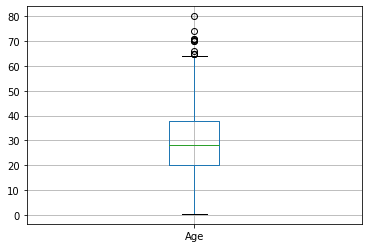

In [ ]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

titanic_atributes.boxplot(column="Age")
titanic_atributes['Age'].describe()

É possível considerar que os dados de idade estão centrados, pois a 
diferença percentual entre a média e mediana é baixa. Podemos afirmar que 50% dos dados estão centrados entre 20 e 38.

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

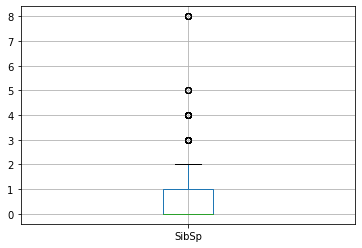

In [ ]:
titanic_atributes.boxplot(column="SibSp")
titanic_atributes['SibSp'].describe()

É possível observar que os dados não estão centrados, pois a mediana (medida de 50% - 0) está deslocada da média (0.52). O intervalo de 0 a 1 possui 50% dos dados

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

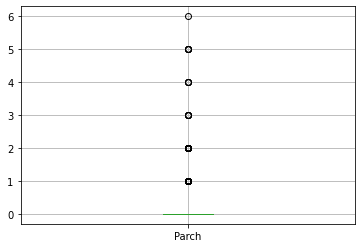

In [ ]:
titanic_atributes.boxplot(column="Parch")
titanic_atributes['Parch'].describe()

É possível observar que o número de pais com crianças abordo em sua maioria é nulo, pois os principais percentis se acumulam em 0, sendo todos os demais outliers

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

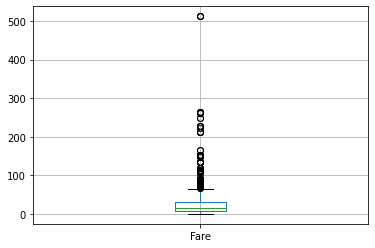

In [ ]:
titanic_atributes.boxplot(column="Fare")
titanic_atributes['Fare'].describe()

É possível observar que os dados não estão centrados, pois a mediana (medida de 50% - 14.454) está deslocada da média (32.2042). O intervalo de 7.91 a 31.0 possui 50% dos dados

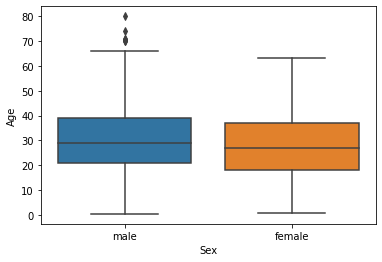

In [ ]:
sns.boxplot(x="Sex", y="Age", data=titanic_atributes)

É possível observar que existe uma distribuição semelhante de idades por sexo (possui uma área semelhante), no qual a a mediana de ambos estão por volta de aproximadamente 29 anos. Sem dizer que ambos estão centrados, com mediana e média próximos provavelmente.

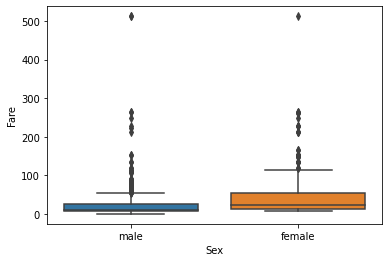

In [ ]:
sns.boxplot(x="Sex", y="Fare", data=titanic_atributes)

É possível que o preço da passagem pode possuir uma boa relação com o gênero, pois pelo boxplot é possível analisar que em média as mulheres pagaram mais caro pela passagem

## b)

- É possível concluir que a idade, por possuir a mediana próxima da média dos valores amostrados, segue uma distribuição normal.

- O atributo Fare é desiquilibrado a esquerda já que ele concentra os percentis próximos ao início da escala

- A distribuição de idade por sexo segue uma distribuição normal para ambos, já que possuem mediana próximo da média, e além disso é possível observar que a distribuição (curva) é semelhente.

## c)

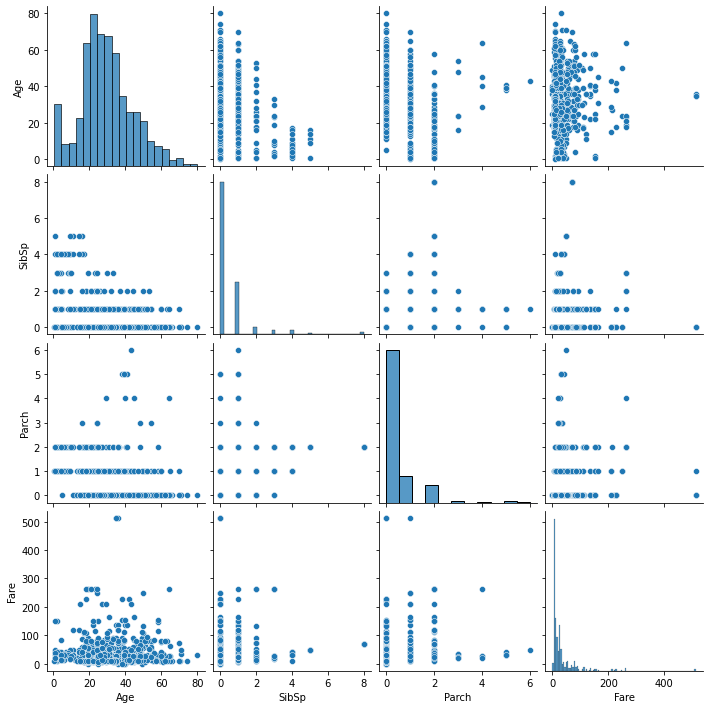

In [ ]:
sns.pairplot(titanic_atributes)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


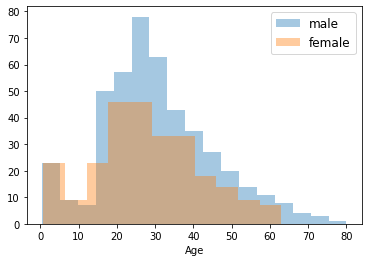

In [ ]:
#titanic_atributes.plot.scatter(x='Sex',y='Age')

df = titanic_atributes[titanic_atributes.Sex == 'male']
sns.distplot(df['Age'],  kde=False,label='male')

df = titanic_atributes[titanic_atributes.Sex == 'female']
sns.distplot(df['Age'],  kde=False,label='female')

plt.legend(prop={'size': 12})
#plt.title('')
#plt.xlabel('Life Exp (years)')
#plt.ylabel('Density')

##d)

- No pairplot é possível observar o histograma do atributo Age e observar que realmente se aproxima muito de uma distribuição normal (formato de sino)

- No pairplot é possível observar o histograma do atributo Fare e observar que realmente é uma distribuição desequilibrada para esquerda, já que existe uma densidade maior no início da escala


- Pelos histogramas do sexo masculino e femino é possível observar que realmente seguem uma distribuição normal, sendo suas distribuições com comportamento bem próximo


 
# **2 - PRÉ-PROCESSAMENTO DOS DADOS** 

**a)** Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça tratamento de atributos categóricos. 

**b)** Remova os atributos que achar necessário.  

**c)** Faça também a seleção dos atributos que achar mais relevantes.
 Explique porque os escolheu. 


Removendo a coluna Unnamed: 0, que não é útil no treinamento.

In [ ]:
titanic_data = pd.read_csv("/content/drive/My Drive/Ciencia de Dados/Prova Prática/titanic_prova.csv", na_values=['?'])
titanic_data = titanic_data.drop(columns = ["Unnamed: 0"])
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Substituindo os valores numéricos faltantes utilizando a estratégia de média e os valores categóricos faltantes utilizando a estratégia mais frequente. Os atributos categóricos foram transformados na representação One-Hot. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

feature_numericos = ['Age', 'Fare']
feature_categoricos = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

pipeline_numerico = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
pipeline_categorico = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())])

transformacao = ColumnTransformer(transformers=[('transformacao numerica', pipeline_numerico, feature_numericos), ('transformacao categorica', pipeline_categorico, feature_categoricos)])

dados_transformados = transformacao.fit_transform(titanic_data)
dados_transformados.round(2)

array([[-0.59, -0.5 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.64,  0.79,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [-0.28, -0.49,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 0.  , -0.18,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [-0.28, -0.04,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.18, -0.49,  1.  , ...,  0.  ,  1.  ,  0.  ]])

Transformando o array definido acima em um dataframe.

In [ ]:
#adicionando nome às variáveis do dataframe
nomes = []
# Variáveis numéricas não tem alteração de tamanho, logo:
nomes = nomes + feature_numericos

# Para os dados categóricos devemos acessar o transformador:
transformacao_categorica = transformacao.transformers_[1]
# Depois o pipeline
pipeline_categorico = transformacao_categorica[1]
# E finalmente o onehot
transf_onehot = pipeline_categorico.named_steps['onehot']
# Para acessar o nome das variáveis usamos o método get_feature_names()
nomes = nomes + (transf_onehot.get_feature_names().tolist())


dataframe_proc = pd.DataFrame(data = dados_transformados, columns=nomes)
dataframe_proc.round(2)

,Age,Fare,x0_No,x0_Yes,x1_female,x1_male,x2_1,x2_2,x2_3,x3_0,x3_1,x3_2,x3_3,x3_4,x3_5,x3_8,x4_0,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6,x5_C,x5_Q,x5_S
0,-0.59,-0.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.64,0.79,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.28,-0.49,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.41,0.42,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.41,-0.49,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.21,-0.39,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-0.82,-0.04,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.00,-0.18,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-0.28,-0.04,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Neste caso, x2 é a classe do passsageiro, sendo:

x2_1 = Primeira Classe

x2_2 = Segunda Classe

x2_3 = Terceira Classe

x3 é o número de irmãos por cônjuge à bordo:

x3_n = número de irmãos n

x4 é o número de pais por criança à bordo:

x4_n = número de pais n

E x5 é o porto de embarque do passageiro:

x5_C=Cherbourg

x5_Q=Queenstown

x5_S=Southampton 





Dessa forma, para encontrar as variáveis mais importante utilizaremos o método Feature Importance. Ele fornece uma pontuação para cada variável do conjunto de dados, sendo que quanto maior a pontuação, mais importante ou relevante é aquela variável para a saída, havendo uma maior relação. Esse método é uma classe embutida que vem com classificadores baseados em árvores de decisão, logo usaremos o Extra Tree Classifier para extrair os 10 principais recursos para o conjunto de dados.

[2.15745089e-03 3.48957902e-03 4.13610099e-01 4.55736932e-01
 4.02618203e-02 3.89113606e-02 9.44912623e-03 2.41941344e-03
 1.90082592e-02 1.43648664e-03 2.41090574e-03 1.69990806e-04
 6.04821396e-04 4.10999342e-04 2.60959897e-05 1.28600958e-04
 2.50902556e-03 1.28865116e-03 7.28406166e-04 4.88799546e-05
 1.40889701e-04 1.11101872e-04 6.13555747e-06 2.28108100e-03
 6.31836651e-04 2.02205027e-03]


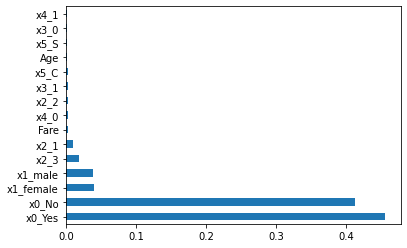

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
num = dataframe_proc['x0_Yes']
model = ExtraTreesClassifier()
model.fit(dataframe_proc,num)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=dataframe_proc.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
final_features = []
for index, _ in feat_importances.nlargest(10).iteritems():
  final_features.append(index)

print(final_features)

['x0_No', 'x0_Yes', 'x1_male', 'x1_female', 'x2_3', 'x2_1', 'Fare', 'x4_0', 'x3_1', 'Age']


Dentre os atributos avaliados, decidimos que as variáveis de maior relevância são o sexo, a classe do passageiro, o preço pago pela passagem e idade. 

#**3 - Modelagem dos Dados**
Pede-se:
**a)** Usar a função abaixo para classificação da sua base de dados

**b)** Baseado nos resultados do item anterior, qual é o melhor modelo?

**c)** Reduzir a dimensionalidade dos dados usando a tecnica PCA.

**d)** Verificar o desempenho dos classificadores com a redução da dimensionalidade e comentar sobre o

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
}

X = dataframe_proc[['x1_male', 'x1_female', 'x2_3', 'x2_2','x2_1', 'Fare', 'Age']]
y = dataframe_proc[['x0_No', 'x0_Yes']]
yb = dataframe_proc['x0_Yes']

for classificador_name in classificadores:  
  modelo = classificadores[classificador_name]["modelo"]
  if (classificador_name == "Multi-Layer Perceptron (15,)"):
    classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=10)
  else:
    classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, yb, cv=10)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

Multi-Layer Perceptron (15,): 76.77 
SVM Polinomial Grau 3: 81.36 
Árvore Decisão Critério Gini: 77.11 


# b)

Considerando somente a acurácia dos modelos oferecidos, foi se escolhido o SVM Polinomial Grau 3 como o melhor dentre eles.

# c)

In [ ]:
from sklearn.decomposition import PCA

final_dataset = X
for n_components in range (2,6):
  decomposition_pca = PCA(n_components, whiten='True')
  decomposed_dataset = decomposition_pca.fit(final_dataset).transform(final_dataset)

  print('\n \nUtilizando ' + str(n_components) + " componentes")
  print('Variança de cada elemento:', decomposition_pca.explained_variance_ratio_)
  print('Variancia total do conjunto:', round(sum(list(decomposition_pca.explained_variance_ratio_))*100,2), '%')

#foi possivel reduzir o número total de váriaveis de 10 para 5 mantendo 85% da vâriancia total


 
Utilizando 2 componentes
Variança de cada elemento: [0.41123081 0.30982595]
Variancia total do conjunto: 72.11 %

 
Utilizando 3 componentes
Variança de cada elemento: [0.41123081 0.30982595 0.14016363]
Variancia total do conjunto: 86.12 %

 
Utilizando 4 componentes
Variança de cada elemento: [0.41123081 0.30982595 0.14016363 0.09294629]
Variancia total do conjunto: 95.42 %

 
Utilizando 5 componentes
Variança de cada elemento: [0.41123081 0.30982595 0.14016363 0.09294629 0.04583331]
Variancia total do conjunto: 100.0 %


Utilizando o método PCA, foi possível conseguir uma variância de 86,12% com o uso de apenas 3 componentes. Isso diminui a dimensionalidade do nosso dataset final mantendo suas propriedades.

#d)

In [ ]:
final_dataset = X

decomposition_pca = PCA(n_components = 3, whiten='True')
decomposed_dataset = decomposition_pca.fit(final_dataset).transform(final_dataset)

In [ ]:
X = decomposed_dataset

for classificador_name in classificadores:  
  modelo = classificadores[classificador_name]["modelo"]
  if (classificador_name == "Multi-Layer Perceptron (15,)"):
    classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=10)
  else:
    classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, yb, cv=10)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

Multi-Layer Perceptron (15,): 78.45 
SVM Polinomial Grau 3: 79.23 
Árvore Decisão Critério Gini: 77.11 


É possível observar que ao usar o PCA para reduzir a dimensionalidade dos atributos não houve mudanças significativas nas acurácias de cada classificador. O primeiro modelo melhorou levemente, o segundo houve ligeira piora e o último se manteve o mesmo. Apesar das variações o SVM Polinomial ainda se manteve sendo o melhor.